<a href="https://colab.research.google.com/github/Ahmed-Shatla/Grad_traffic/blob/main/create_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/MyDrive/Traffic'

In [3]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import visualkeras

#1 ===> STOP
#2 ===> TURN LEFT
#3 ===> TURN RIGHT


In [5]:
images = []
labels = []
for label in os.listdir(data_path):
  for image in os.listdir(data_path+'/'+label):
    img = cv2.imread(data_path+'/'+label+'/'+image)
    images.append(img)
    labels.append(label)

In [6]:
def get_avg_shape(images):
  w = []
  h = []
  for image in images:
    h.append(image.shape[0])
    w.append(image.shape[1])

  return int(np.mean(h)),int(np.mean(w))

In [7]:
avg_h,avg_w = get_avg_shape(images)
print("Average Shape: "+str(avg_h)+","+str(avg_w))

Average Shape: 103,102


In [8]:
def reshape_images(images):
  reshaped_img = []
  for image in images:
    reshaped_img.append(cv2.resize(image,(90,90)))
  return reshaped_img

In [9]:
reshaped_images = reshape_images(images)

In [10]:
reshaped_images[0].shape

(90, 90, 3)

In [11]:
X = reshaped_images

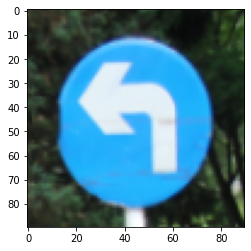

In [12]:
plt.imshow(cv2.cvtColor(X[4],cv2.COLOR_BGR2RGB))

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels = lb.fit_transform(labels)

In [14]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)

In [15]:
y.shape

(1249, 3)

In [16]:
X = np.array(X)

In [17]:
X.shape

(1249, 90, 90, 3)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

#Transfare learning

In [19]:
from tensorflow.keras.applications import VGG16

In [20]:
full_vgg16 =  VGG16(weights='imagenet')

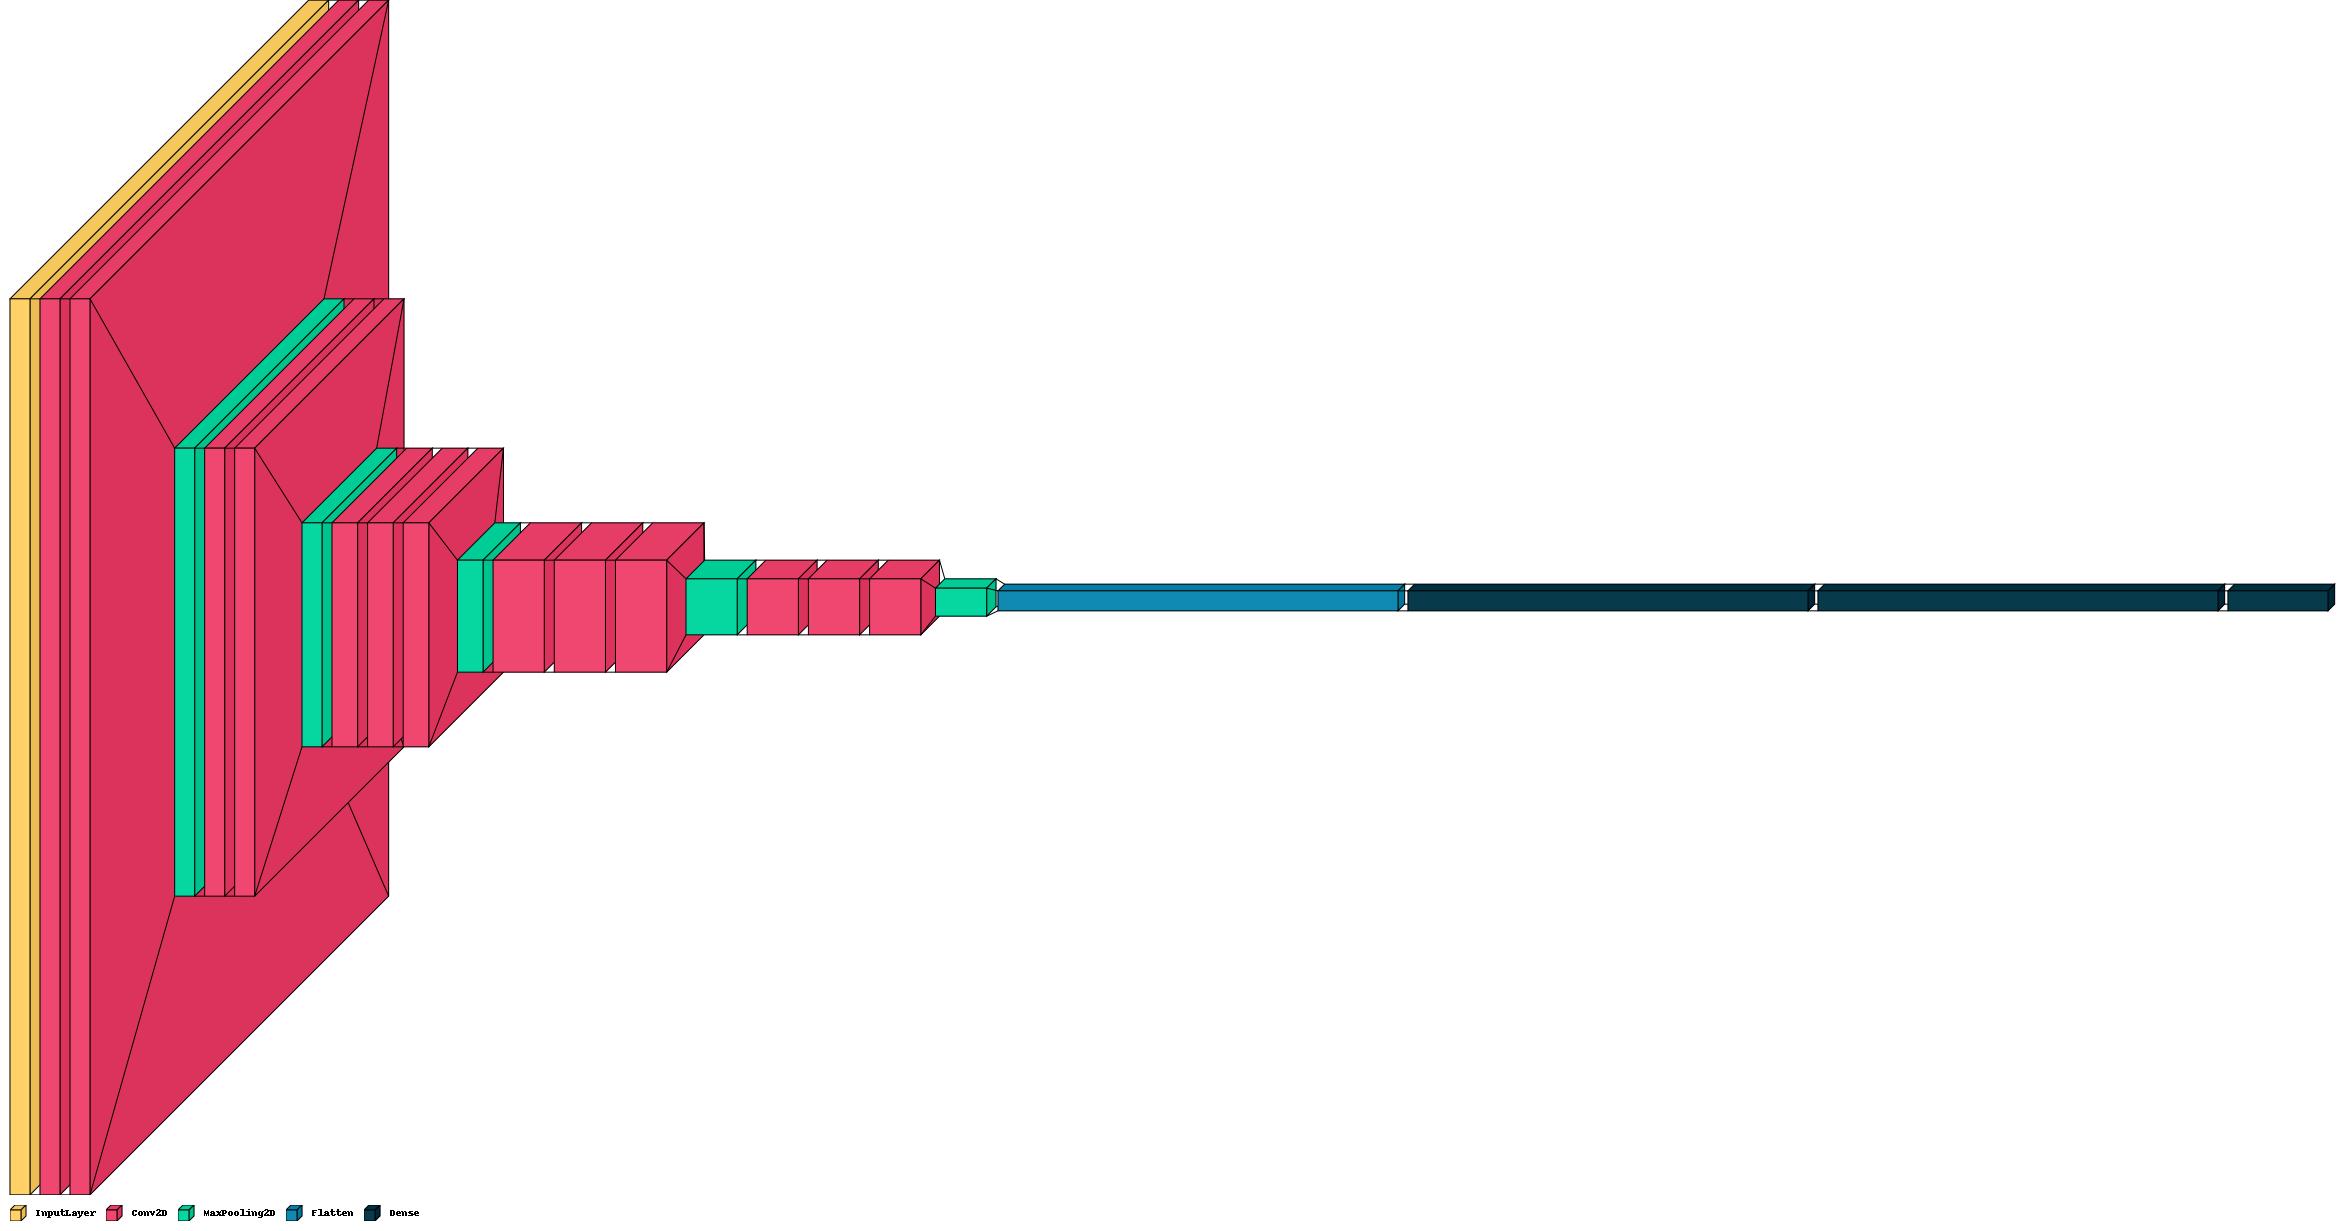

In [21]:
visualkeras.layered_view(full_vgg16,legend=True)

In [22]:
model = VGG16(weights='imagenet',include_top=False,input_shape=((90,90,3)))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 90, 90, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 90, 90, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 90, 90, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 45, 45, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 45, 45, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 45, 45, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 22, 22, 128)       0     

In [23]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Model

In [24]:
for layer in model.layers:
  layer.trainable = False

In [25]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 90, 90, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 90, 90, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 90, 90, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 45, 45, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 45, 45, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 45, 45, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 22, 22, 128)       0     

In [26]:
model_output = model.output
model_output = Flatten()(model_output)
model_output = Dense(512,activation='relu')(model_output)
model_output = Dense(256,activation='relu')(model_output)
model_output = Dropout(.2)(model_output)
model_output = Dense(128,activation='relu')(model_output)
model_output = Dense(64,activation='relu')(model_output)
model_output = Dense(128,activation='relu')(model_output)
model_output = Dense(256,activation='relu')(model_output)
model_output = Dropout(.1)(model_output)


model_output = Dense(3,activation='sigmoid')(model_output)

final_model = Model(model.input,model_output)

In [27]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 90, 90, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 90, 90, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 90, 90, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 45, 45, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 45, 45, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 45, 45, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 22, 22, 128)       0     

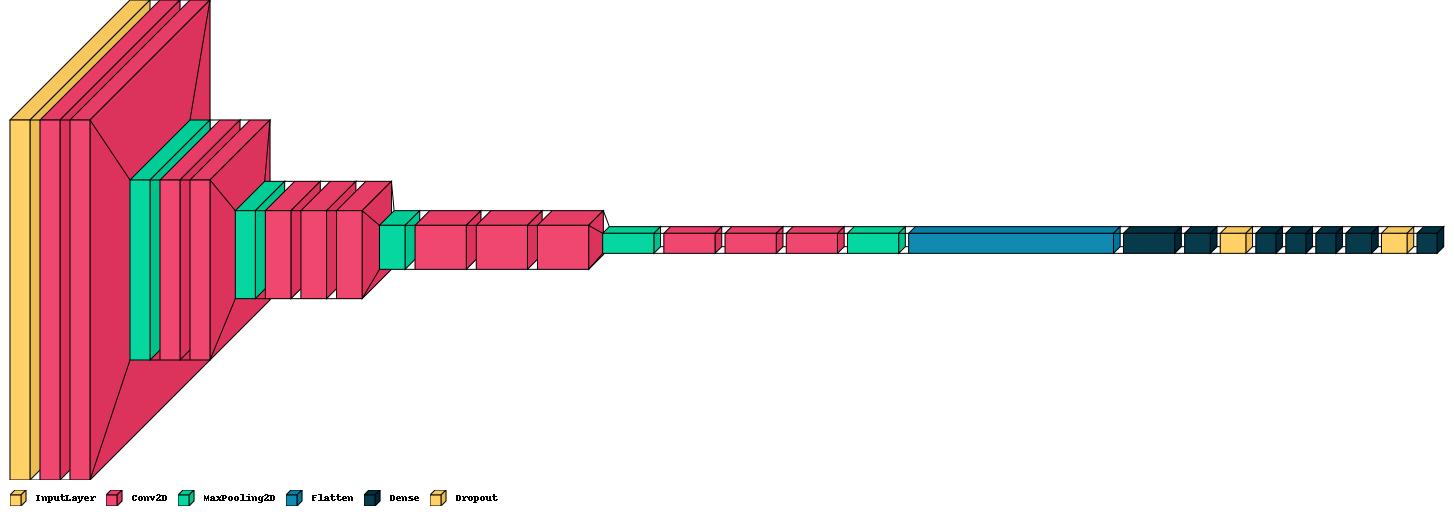

In [28]:
visualkeras.layered_view(final_model,legend=True)

In [29]:
final_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [30]:
history = final_model.fit(X_train,y_train,batch_size=64,epochs=3,validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/3
16/16 [==============================] - 104s 6s/step - loss: 0.8104 - accuracy: 0.6767 - val_loss: 0.3939 - val_accuracy: 0.8160
Epoch 2/3
16/16 [==============================] - 101s 6s/step - loss: 0.3665 - accuracy: 0.8338 - val_loss: 0.2738 - val_accuracy: 0.8680
Epoch 3/3
16/16 [==============================] - 98s 6s/step - loss: 0.2288 - accuracy: 0.9069 - val_loss: 0.1976 - val_accuracy: 0.9240


In [31]:
final_model.save('CNN_Model.h5')

Text(0.5, 0, 'epochs')

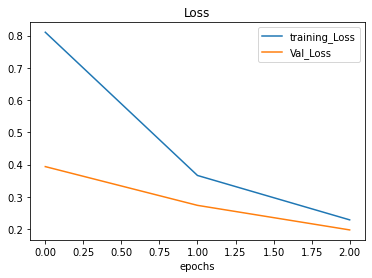

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

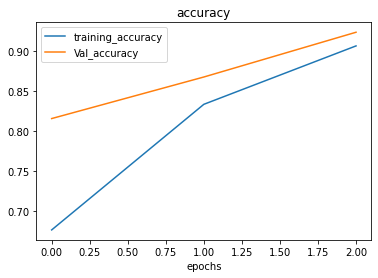

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')